In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
%matplotlib inline

In [2]:
url = 'https://www.worldatlas.com/countries'

In [4]:
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text,parser='html.parser')

In [70]:
pd.options.display.float_format = '{:,.0f}'.format


In [39]:
from collections import defaultdict,OrderedDict

In [151]:
class_name = 'country_landing_list_item'

country_boxes = soup.find_all('li',class_='country_landing_list_item')

country_info_columns = ['Name','Population','GDP','GDP / Capita','Capital City','ISO alpha-2','ISO alpha-3','Dialing Code']

mapping = defaultdict(list)
rows = []
for country_box in country_boxes:
    
    
    v = {}
    for column in country_info_columns:
        v[column] = np.nan
        
    country_name = country_box.find('h3').getText()
    v['Name'] = country_name
    table_rows = country_box.find_all('tr')
    for table_row in table_rows:
        name = table_row.find('th').getText()
        
        data = table_row.find('td').getText()
        v[name] = data
            
    
    
    rows.append(list(v.values()))
    


In [60]:
rows

[['Afghanistan',
  '33,332,025',
  '$64.08 Billion',
  '$2,000',
  'Kabul',
  'AF',
  'AFG',
  '+93'],
 ['Albania',
  '3,038,594',
  '$33.90 Billion',
  '$11,900',
  'Tirana',
  'AL',
  'ALB',
  '+355'],
 ['Algeria',
  '40,263,711',
  '$609.00 Billion',
  '$15,000',
  'Algiers',
  'DZ',
  'DZA',
  '+213'],
 ['Andorra',
  '85,660',
  '$3.33 Billion',
  '$49,900',
  'Andorra la Vella',
  'AD',
  'AND',
  '+376'],
 ['Angola',
  '25,789,024',
  '$189.00 Billion',
  '$6,800',
  'Luanda',
  'AO',
  'AGO',
  '+244'],
 ['Antigua and Barbuda',
  '93,581',
  '$2.17 Billion',
  '$24,100',
  "St. John's",
  'AG',
  'ATG',
  '+1-268'],
 ['Argentina',
  '43,886,748',
  '$879.00 Billion',
  '$20,200',
  'Buenos Aires',
  'AR',
  'ARG',
  '+54'],
 ['Armenia',
  '3,051,250',
  '$26.30 Billion',
  '$8,900',
  'Yerevan',
  'AM',
  'ARM',
  '+374'],
 ['Australia',
  '22,992,654',
  '$1.19 Trillion',
  '$48,800',
  'Canberra',
  'AU',
  'AUS',
  '+61'],
 ['Austria',
  '8,711,770',
  '$417.00 Billion',
  '$

In [152]:
columns = ['Name','Population','GDP','GDP_Per_Capita','Capital','Alpha2','Alpha3','Dialing_Code']

In [153]:
countries = pd.DataFrame(rows,columns=columns)

In [87]:
countries

,Name,Population,GDP,GDP_Per_Capita,Capital,Alpha2,Alpha3,Dialing_Code
0,Afghanistan,"33,332,025",$64.08 Billion,"$2,000",Kabul,AF,AFG,+93
1,Albania,"3,038,594",$33.90 Billion,"$11,900",Tirana,AL,ALB,+355
2,Algeria,"40,263,711",$609.00 Billion,"$15,000",Algiers,DZ,DZA,+213
3,Andorra,"85,660",$3.33 Billion,"$49,900",Andorra la Vella,AD,AND,+376
4,Angola,"25,789,024",$189.00 Billion,"$6,800",Luanda,AO,AGO,+244
...,...,...,...,...,...,...,...,...
220,Tokelau,"1,285",$1.50 Million,"$1,000",,TK,TKL,+690
221,Turks and Caicos Islands,"51,430",$632.00 Million,"$29,100",Cockburn Town,TC,TCA,+1-649
222,U.S. Virgin Islands,"102,951",$3.79 Billion,"$36,100",Charlotte Amalie,VI,VIR,+1-340
223,Wallis and Futuna,"15,664",$60.00 Million,"$3,800",Mata Utu,WF,WLF,+681


In [65]:
countries.Population = countries.Population.str.replace(r'\D','',regex=True).astype('float')

In [154]:
columns = ['Population','GDP_Per_Capita']

In [75]:
def convert(column):
    
    return pd.to_numeric(column.str.replace(r'\D',''))

In [155]:
countries[columns] = countries[columns].apply(convert)

C:\Users\Dara\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
countries

,Name,Population,GDP,GDP_Per_Capita,Capital,Alpha2,Alpha3,Dialing_Code
0,Afghanistan,"33,332,025",$64.08 Billion,"2,000",Kabul,AF,AFG,+93
1,Albania,"3,038,594",$33.90 Billion,"11,900",Tirana,AL,ALB,+355
2,Algeria,"40,263,711",$609.00 Billion,"15,000",Algiers,DZ,DZA,+213
3,Andorra,"85,660",$3.33 Billion,"49,900",Andorra la Vella,AD,AND,+376
4,Angola,"25,789,024",$189.00 Billion,"6,800",Luanda,AO,AGO,+244
...,...,...,...,...,...,...,...,...
220,Tokelau,"1,285",$1.50 Million,"1,000",,TK,TKL,+690
221,Turks and Caicos Islands,"51,430",$632.00 Million,"29,100",Cockburn Town,TC,TCA,+1-649
222,U.S. Virgin Islands,"102,951",$3.79 Billion,"36,100",Charlotte Amalie,VI,VIR,+1-340
223,Wallis and Futuna,"15,664",$60.00 Million,"3,800",Mata Utu,WF,WLF,+681


In [119]:
countries['GDP']

0       $64.08 Billion
1       $33.90 Billion
2      $609.00 Billion
3        $3.33 Billion
4      $189.00 Billion
            ...       
220      $1.50 Million
221    $632.00 Million
222      $3.79 Billion
223     $60.00 Million
224    $906.50 Million
Name: GDP, Length: 225, dtype: object

In [94]:
import re

In [156]:
def convert_gdp(value):
    
    try:
        number,unit= value.split()
        number = float(re.sub('\$','',number))
        if unit == 'Million':
            return number *1e6
        elif unit == 'Trillion':
            return number *1e12
        else:
            return number * 1e9
    
    except:
        return np.nan

In [81]:
countries.GDP.max()

98800.0

In [91]:
value = countries.at[0,'GDP']

In [92]:
value

'$64.08 Billion'

In [93]:
value.split()

['$64.08', 'Billion']

In [157]:
countries.GDP = countries.GDP.apply(convert_gdp)

In [98]:
number ='$64.08'

In [99]:
re.sub('\$','',number)

'64.08'

In [134]:
x = np.nan

In [136]:
x is np.nan

True

In [141]:
y = np.nan

In [142]:
y is np.nan

True

In [147]:
countries[countries.GDP_Per_Capita.isna()]

,Name,Population,GDP,GDP_Per_Capita,Capital,Alpha2,Alpha3,Dialing_Code
11,Bahamas,"327,316","9,070,000,000",NaN,Nassau,BS,BHS,+1-242
38,Republic of the Congo,"4,852,412","30,270,000,000",NaN,Brazzaville,CG,COG,+242
45,Democratic Republic of the Congo,"81,331,050","65,040,000,000",NaN,Kinshasa,CD,COD,+243
61,Gambia,"2,009,648","3,390,000,000",NaN,Banjul,GM,GMB,+220
110,Micronesia,"104,719","314,000,000",NaN,Palikir,FM,FSM,+691
126,North Korea,"25,115,311","40,000,000,000",NaN,Pyongyang,KP,PRK,+850
158,South Korea,"50,924,172","1,930,000,000",NaN,Seoul,KR,KOR,+82
193,Palestinian Territory,"4,550,368",NaN,NaN,East Jerusalem,PS,PSE,+970
194,Vatican,"1,000",NaN,NaN,Vatican City,VA,VAT,+379
202,Falkland Islands,"2,931",NaN,NaN,Stanley,FK,FLK,+500


In [158]:
countries.nlargest(10,'GDP')

,Name,Population,GDP,GDP_Per_Capita,Capital,Alpha2,Alpha3,Dialing_Code
35,China,"1,373,541,278","21,100,000,000,000","14,600",Beijing,CN,CHN,+86
184,United States,"323,995,528","18,600,000,000,000","57,300",Washington,US,USA,+1
75,India,"1,266,883,598","8,720,000,000,000","6,700",New Delhi,IN,IND,+91
83,Japan,"126,702,133","4,930,000,000,000","38,900",Tokyo,JP,JPN,+81
63,Germany,"80,722,792","3,980,000,000,000","48,200",Berlin,DE,DEU,+49
140,Russia,"142,355,415","3,750,000,000,000","26,100",Moscow,RU,RUS,+7
23,Brazil,"205,823,665","3,080,000,000,000","14,800",Brasilia,BR,BRA,+55
76,Indonesia,"258,316,051","3,030,000,000,000","11,700",Jakarta,ID,IDN,+62
183,United Kingdom,"64,430,428","2,790,000,000,000","42,500",London,GB,GBR,+44
59,France,"66,836,154","2,700,000,000,000","42,400",Paris,FR,FRA,+33


In [160]:
countries[countries.GDP >= 1e12].sort_values(by='GDP',ascending=False)

,Name,Population,GDP,GDP_Per_Capita,Capital,Alpha2,Alpha3,Dialing_Code
35,China,"1,373,541,278","21,100,000,000,000","14,600",Beijing,CN,CHN,+86
184,United States,"323,995,528","18,600,000,000,000","57,300",Washington,US,USA,+1
75,India,"1,266,883,598","8,720,000,000,000","6,700",New Delhi,IN,IND,+91
83,Japan,"126,702,133","4,930,000,000,000","38,900",Tokyo,JP,JPN,+81
63,Germany,"80,722,792","3,980,000,000,000","48,200",Berlin,DE,DEU,+49
140,Russia,"142,355,415","3,750,000,000,000","26,100",Moscow,RU,RUS,+7
23,Brazil,"205,823,665","3,080,000,000,000","14,800",Brasilia,BR,BRA,+55
76,Indonesia,"258,316,051","3,030,000,000,000","11,700",Jakarta,ID,IDN,+62
183,United Kingdom,"64,430,428","2,790,000,000,000","42,500",London,GB,GBR,+44
59,France,"66,836,154","2,700,000,000,000","42,400",Paris,FR,FRA,+33


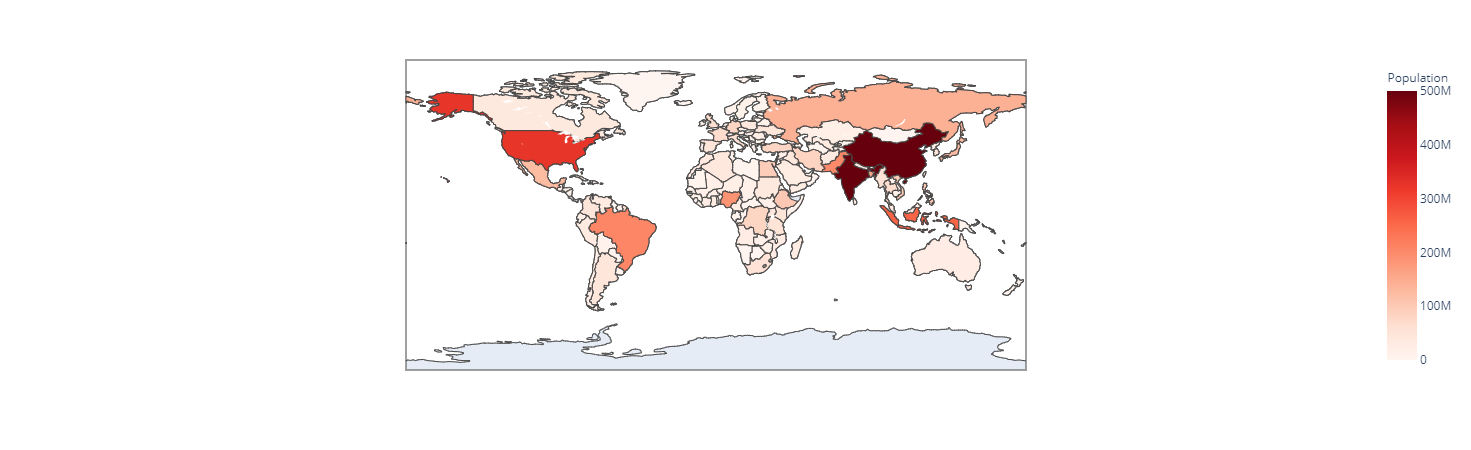

In [163]:
px.choropleth(data_frame=countries,locations='Alpha3',color='Population',color_continuous_scale='Reds',range_color=[0,500000000])